In [0]:
import time

import matplotlib.pyplot as plt
import numpy as np

import tensorflow as tf

from keras import backend as K
from keras.models import Sequential, Model
from keras.layers.convolutional import Convolution2D, MaxPooling2D, Conv2D, SeparableConv2D
from keras.layers import Activation, Flatten, Dense, Dropout, Input, Lambda
from keras.layers.normalization import BatchNormalization
from keras.utils import np_utils
from keras.regularizers import l2
from keras.preprocessing.image import ImageDataGenerator
from keras.layers.merge import Concatenate

from keras.datasets import cifar10

% matplotlib inline

Using TensorFlow backend.


In [0]:
np.random.seed(2017) 

In [0]:
(train_features, train_labels), (test_features, test_labels) = cifar10.load_data()
num_train, img_channels, img_rows, img_cols =  train_features.shape
num_test, _, _, _ =  test_features.shape
num_classes = len(np.unique(train_labels))
print(num_test)

170500096/170498071 [==============================] - 6s 0us/step
10000


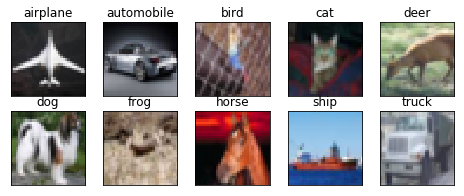

In [0]:
class_names = ['airplane','automobile','bird','cat','deer',
               'dog','frog','horse','ship','truck']

fig = plt.figure(figsize=(8,3))

for i in range(num_classes):
    ax = fig.add_subplot(2, 5, 1 + i, xticks=[], yticks=[])
    idx = np.where(train_labels[:]==i)[0]
    features_idx = train_features[idx,::]
    img_num = np.random.randint(features_idx.shape[0])
    im = features_idx[img_num]
    ax.set_title(class_names[i])
    plt.imshow(im)

plt.show()

In [0]:
def plot_model_history(model_history):
    fig, axs = plt.subplots(1,2,figsize=(15,5))
    # summarize history for accuracy
    axs[0].plot(range(1,len(model_history.history['acc'])+1),model_history.history['acc'])
    axs[0].plot(range(1,len(model_history.history['val_acc'])+1),model_history.history['val_acc'])
    axs[0].set_title('Model Accuracy')
    axs[0].set_ylabel('Accuracy')
    axs[0].set_xlabel('Epoch')
    axs[0].set_xticks(np.arange(1,len(model_history.history['acc'])+1),len(model_history.history['acc'])/10)
    axs[0].legend(['train', 'val'], loc='best')
    # summarize history for loss
    axs[1].plot(range(1,len(model_history.history['loss'])+1),model_history.history['loss'])
    axs[1].plot(range(1,len(model_history.history['val_loss'])+1),model_history.history['val_loss'])
    axs[1].set_title('Model Loss')
    axs[1].set_ylabel('Loss')
    axs[1].set_xlabel('Epoch')
    axs[1].set_xticks(np.arange(1,len(model_history.history['loss'])+1),len(model_history.history['loss'])/10)
    axs[1].legend(['train', 'val'], loc='best')
    plt.show()

In [0]:
def accuracy(test_x, test_y, model):
    result = model.predict(test_x)
    predicted_class = np.argmax(result, axis=1)
    true_class = np.argmax(test_y, axis=1)
    num_correct = np.sum(predicted_class == true_class) 
    accuracy = float(num_correct)/result.shape[0]
    return (accuracy * 100)

In [0]:
train_features = train_features.astype('float32')/255
test_features = test_features.astype('float32')/255
# convert class labels to binary class labels
train_labels = np_utils.to_categorical(train_labels, num_classes)
test_labels = np_utils.to_categorical(test_labels, num_classes)

In [0]:
def space_to_depth(x,block_size=2):
  
  return tf.nn.space_to_depth(
    x,
    block_size,
    name='space_to_depth',
    data_format='NHWC'
)

# Model 1

In [0]:
input_features=Input(shape=(32,32,3))

layer1=SeparableConv2D(8, (5,5), use_bias=False, padding='same')(input_features)
layer1=BatchNormalization()(layer1)
layer1=Activation('relu')(layer1)
layer1=Dropout(0.1)(layer1)

layer2=Conv2D(8, (5,5),use_bias=False,padding='same')(layer1)
layer2=BatchNormalization()(layer2)
layer2=Activation('relu')(layer2)
layer2=Dropout(0.1)(layer2)

layer3=Conv2D(16, (5,5),use_bias=False,padding='same')(layer2)
layer3=BatchNormalization()(layer3)
layer3=Activation('relu')(layer3)
layer3=Dropout(0.1)(layer3)


layer4=SeparableConv2D(16, (5,5), use_bias=False, padding='same')(layer3)
layer4=BatchNormalization()(layer4)
layer4=Activation('relu')(layer4)
layer4=Dropout(0.1)(layer4)

concat_layer_1=Concatenate()([layer1,layer4])

pool_layer_1=MaxPooling2D(2,2)(concat_layer_1)

layer5=SeparableConv2D(32, (3,3), use_bias=False, padding='same')(pool_layer_1)
layer5=BatchNormalization()(layer5)
layer5=Activation('relu')(layer5)
layer5=Dropout(0.1)(layer5)

layer6=Conv2D(32, (5,5), use_bias=False, padding='same')(layer5)
layer6=BatchNormalization()(layer6)
layer6=Activation('relu')(layer6)
layer6=Dropout(0.1)(layer6)

layer7=SeparableConv2D(64, (3,3), use_bias=False, padding='same')(layer6)
layer7=BatchNormalization()(layer7)
layer7=Activation('relu')(layer7)
layer7=Dropout(0.1)(layer7)

layer8=Conv2D(64, (5,5), use_bias=False, padding='same')(layer7)
layer8=BatchNormalization()(layer8)
layer8=Activation('relu')(layer8)
layer8=Dropout(0.1)(layer8)

concat_layer_2=Concatenate()([layer5,layer8])

pool_layer_2=MaxPooling2D(2,2)(concat_layer_2)

layer9=Conv2D(96, (5,5), use_bias=False, padding='same')(pool_layer_2)
layer9=BatchNormalization()(layer9)
layer9=Activation('relu')(layer9)
layer9=Dropout(0.1)(layer9)

layer10=SeparableConv2D(96, (3,3), use_bias=False, padding='same')(layer9)
layer10=BatchNormalization()(layer10)
layer10=Activation('relu')(layer10)
layer10=Dropout(0.1)(layer10)

layer11=Conv2D(128, (5,5), use_bias=False, padding='same')(layer10)
layer11=BatchNormalization()(layer11)
layer11=Activation('relu')(layer11)
layer11=Dropout(0.1)(layer11)

layer12=SeparableConv2D(128, (5,5), use_bias=False, padding='same')(layer11)
layer12=BatchNormalization()(layer12)
layer12=Activation('relu')(layer12)
layer12=Dropout(0.1)(layer12)

concat_layer_3=Concatenate()([layer10,layer12])

layer13=Conv2D(32,(1,1), use_bias=False, padding='same')(concat_layer_3)
layer13=BatchNormalization()(layer13)
layer13=Dropout(0.1)(layer13)

layer14=SeparableConv2D(10,(8,8),use_bias=False)(layer13)

layer15=Flatten()(layer14)

output=Activation('softmax')(layer15)








Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.



In [0]:
model = Model(input=[input_features], output=[output])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=[<tf.Tenso..., outputs=[<tf.Tenso...)`
  """Entry point for launching an IPython kernel.


In [0]:
model.summary()

Model: "model_11"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_16 (InputLayer)           (None, 32, 32, 3)    0                                            
__________________________________________________________________________________________________
separable_conv2d_85 (SeparableC (None, 32, 32, 8)    99          input_16[0][0]                   
__________________________________________________________________________________________________
batch_normalization_154 (BatchN (None, 32, 32, 8)    32          separable_conv2d_85[0][0]        
__________________________________________________________________________________________________
activation_154 (Activation)     (None, 32, 32, 8)    0           batch_normalization_154[0][0]    
___________________________________________________________________________________________

In [0]:
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras_pre..., validation_data=(array([[[..., verbose=1, shuffle=False, steps_per_epoch=390, epochs=50)`
  # Remove the CWD from sys.path while we load stuff.


Epoch 1/50
390/390 [==============================] - 40s 102ms/step - loss: 1.4687 - acc: 0.4676 - val_loss: 1.5369 - val_acc: 0.4677
Epoch 2/50
390/390 [==============================] - 36s 92ms/step - loss: 1.0509 - acc: 0.6255 - val_loss: 1.0880 - val_acc: 0.6166
Epoch 3/50
390/390 [==============================] - 36s 92ms/step - loss: 0.8759 - acc: 0.6908 - val_loss: 0.9526 - val_acc: 0.6736
Epoch 4/50
390/390 [==============================] - 36s 92ms/step - loss: 0.7650 - acc: 0.7317 - val_loss: 0.8125 - val_acc: 0.7211
Epoch 5/50
390/390 [==============================] - 36s 92ms/step - loss: 0.6872 - acc: 0.7587 - val_loss: 0.8754 - val_acc: 0.7037
Epoch 6/50
390/390 [==============================] - 36s 92ms/step - loss: 0.6210 - acc: 0.7821 - val_loss: 0.9534 - val_acc: 0.6895
Epoch 7/50
390/390 [==============================] - 36s 92ms/step - loss: 0.5636 - acc: 0.8020 - val_loss: 0.7311 - val_acc: 0.7550
Epoch 8/50
390/390 [==============================] - 36s 92m

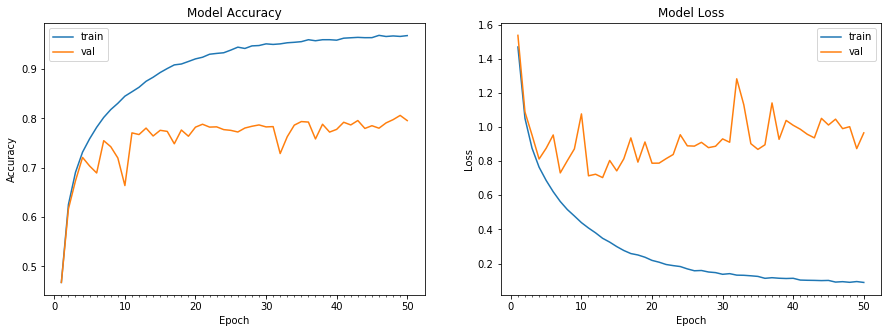

Accuracy on test data is: 79.57


In [0]:
datagen = ImageDataGenerator(zoom_range=0.0, 
                             horizontal_flip=False)


# train the model
start = time.time()
# Train the model
model_info = model.fit_generator(datagen.flow(train_features, train_labels, batch_size = 128),
                                 samples_per_epoch = train_features.shape[0], nb_epoch = 50, 
                                 validation_data = (test_features, test_labels), verbose=1, shuffle=False)
end = time.time()
print ("Model took %0.2f seconds to train"%(end - start))
# plot model history
plot_model_history(model_info)
# compute test accuracy
print ("Accuracy on test data is: %0.2f"%accuracy(test_features, test_labels, model))

# Model 2

In [0]:
input_features=Input(shape=(32,32,3))

layer1=SeparableConv2D(8, (5,5), use_bias=False, padding='same')(input_features)
layer1=BatchNormalization()(layer1)
layer1=Activation('relu')(layer1)
layer1=Dropout(0.05)(layer1)

layer2=Conv2D(8, (5,5),use_bias=False,padding='same')(layer1)
layer2=BatchNormalization()(layer2)
layer2=Activation('relu')(layer2)
layer2=Dropout(0.05)(layer2)

layer3=Conv2D(16, (5,5),use_bias=False,padding='same')(layer2)
layer3=BatchNormalization()(layer3)
layer3=Activation('relu')(layer3)
layer3=Dropout(0.1)(layer3)

outlay_3=Lambda(space_to_depth,arguments = {'block_size':2})(layer3)

layer4=SeparableConv2D(16, (5,5), use_bias=False, padding='same')(layer3)
layer4=BatchNormalization()(layer4)
layer4=Activation('relu')(layer4)
layer4=Dropout(0.1)(layer4)

concat_layer_1=Concatenate()([layer1,layer4])

pool_layer_1=MaxPooling2D(2,2)(concat_layer_1)

layer5=SeparableConv2D(32, (3,3), use_bias=False, padding='same')(pool_layer_1)
layer5=BatchNormalization()(layer5)
layer5=Activation('relu')(layer5)
layer5=Dropout(0.1)(layer5)

outlay_5=Lambda(space_to_depth,arguments = {'block_size':2})(layer5)

layer6=Conv2D(32, (5,5), use_bias=False, padding='same')(layer5)
layer6=BatchNormalization()(layer6)
layer6=Activation('relu')(layer6)
layer6=Dropout(0.1)(layer6)

layer7=SeparableConv2D(64, (3,3), use_bias=False, padding='same')(layer6)
layer7=BatchNormalization()(layer7)
layer7=Activation('relu')(layer7)
layer7=Dropout(0.1)(layer7)

concat_layer_4=Concatenate()([outlay_3,layer7])

layer8=SeparableConv2D(64, (5,5), use_bias=False, padding='same')(concat_layer_4)
layer8=BatchNormalization()(layer8)
layer8=Activation('relu')(layer8)
layer8=Dropout(0.1)(layer8)

concat_layer_2=Concatenate()([layer5,layer8,layer6])

pool_layer_2=MaxPooling2D(2,2)(concat_layer_2)

layer9=Conv2D(96, (5,5), use_bias=False, padding='same')(pool_layer_2)
layer9=BatchNormalization()(layer9)
layer9=Activation('relu')(layer9)
layer9=Dropout(0.1)(layer9)

concat_layer_5=Concatenate()([outlay_5,layer9])

layer10=SeparableConv2D(96, (3,3), use_bias=False, padding='same')(concat_layer_5)
layer10=BatchNormalization()(layer10)
layer10=Activation('relu')(layer10)
layer10=Dropout(0.1)(layer10)

layer11=Conv2D(128, (5,5), use_bias=False, padding='same')(layer10)
layer11=BatchNormalization()(layer11)
layer11=Activation('relu')(layer11)
layer11=Dropout(0.1)(layer11)

layer12=SeparableConv2D(128, (5,5), use_bias=False, padding='same')(layer11)
layer12=BatchNormalization()(layer12)
layer12=Activation('relu')(layer12)
layer12=Dropout(0.1)(layer12)

concat_layer_3=Concatenate()([layer10,layer12])

layer13=Conv2D(32,(1,1), use_bias=False, padding='same')(concat_layer_3)
layer13=BatchNormalization()(layer13)
layer13=Dropout(0.1)(layer13)

layer14=SeparableConv2D(10,(8,8),use_bias=False)(layer13)

layer15=Flatten()(layer14)

output=Activation('softmax')(layer15)


In [0]:
model = Model(input=[input_features], output=[output])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=[<tf.Tenso..., outputs=[<tf.Tenso...)`
  """Entry point for launching an IPython kernel.


In [0]:
model.summary()

Model: "model_2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            (None, 32, 32, 3)    0                                            
__________________________________________________________________________________________________
separable_conv2d_16 (SeparableC (None, 32, 32, 8)    99          input_3[0][0]                    
__________________________________________________________________________________________________
batch_normalization_27 (BatchNo (None, 32, 32, 8)    32          separable_conv2d_16[0][0]        
__________________________________________________________________________________________________
activation_27 (Activation)      (None, 32, 32, 8)    0           batch_normalization_27[0][0]     
____________________________________________________________________________________________

In [0]:
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras_pre..., validation_data=(array([[[..., verbose=1, shuffle=False, steps_per_epoch=390, epochs=50)`
  # Remove the CWD from sys.path while we load stuff.


Epoch 1/50
390/390 [==============================] - 46s 119ms/step - loss: 1.4331 - acc: 0.4803 - val_loss: 1.2620 - val_acc: 0.5431
Epoch 2/50
390/390 [==============================] - 41s 105ms/step - loss: 1.0556 - acc: 0.6229 - val_loss: 1.4410 - val_acc: 0.5052
Epoch 3/50
390/390 [==============================] - 39s 100ms/step - loss: 0.8853 - acc: 0.6860 - val_loss: 1.0786 - val_acc: 0.6259
Epoch 4/50
390/390 [==============================] - 39s 99ms/step - loss: 0.7726 - acc: 0.7298 - val_loss: 0.9137 - val_acc: 0.6851
Epoch 5/50
390/390 [==============================] - 39s 100ms/step - loss: 0.6851 - acc: 0.7618 - val_loss: 0.7955 - val_acc: 0.7249
Epoch 6/50
390/390 [==============================] - 41s 105ms/step - loss: 0.6146 - acc: 0.7826 - val_loss: 0.8680 - val_acc: 0.7044
Epoch 7/50
390/390 [==============================] - 41s 106ms/step - loss: 0.5507 - acc: 0.8050 - val_loss: 0.8982 - val_acc: 0.7012
Epoch 8/50
390/390 [==============================] - 40

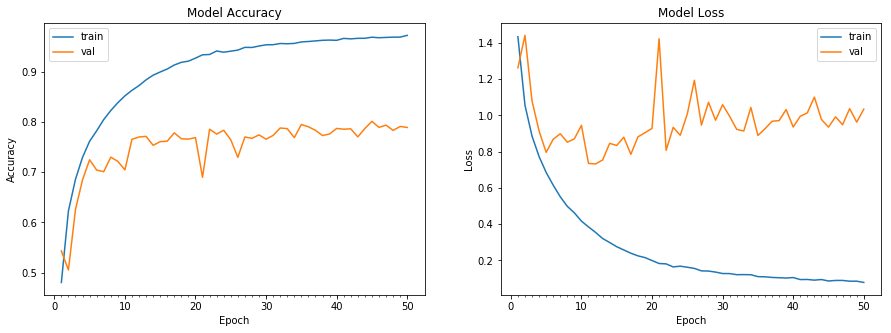

Accuracy on test data is: 78.94


In [0]:
datagen = ImageDataGenerator(zoom_range=0.0, 
                             horizontal_flip=False)


# train the model
start = time.time()
# Train the model
model_info = model.fit_generator(datagen.flow(train_features, train_labels, batch_size = 128),
                                 samples_per_epoch = train_features.shape[0], nb_epoch = 50, 
                                 validation_data = (test_features, test_labels), verbose=1, shuffle=False)
end = time.time()
print ("Model took %0.2f seconds to train"%(end - start))
# plot model history
plot_model_history(model_info)
# compute test accuracy
print ("Accuracy on test data is: %0.2f"%accuracy(test_features, test_labels, model))

# Model 3

In [0]:
input_features=Input(shape=(32,32,3))

layer1=SeparableConv2D(8, (5,5), use_bias=False, padding='same')(input_features)
layer1=BatchNormalization()(layer1)
layer1=Activation('relu')(layer1)
layer1=Dropout(0.1)(layer1)

layer2=Conv2D(8, (5,5),use_bias=False,padding='same')(layer1)
layer2=BatchNormalization()(layer2)
layer2=Activation('relu')(layer2)
layer2=Dropout(0.1)(layer2)

outlay_2=Lambda(space_to_depth,arguments={'block_size':4})(layer2)

layer3=Conv2D(16, (5,5),use_bias=False,padding='same')(layer2)
layer3=BatchNormalization()(layer3)
layer3=Activation('relu')(layer3)
layer3=Dropout(0.1)(layer3)

outlay_3=Lambda(space_to_depth,arguments = {'block_size':2})(layer3)

concat_1=Concatenate()([layer1,layer3])

layer4=SeparableConv2D(16, (5,5), use_bias=False, padding='same')(concat_1)
layer4=BatchNormalization()(layer4)
layer4=Activation('relu')(layer4)
layer4=Dropout(0.1)(layer4)

concat_layer_1=Concatenate()([layer1,layer4])

pool_layer_1=MaxPooling2D(2,2)(concat_layer_1)

layer5=SeparableConv2D(32, (3,3), use_bias=False, padding='same')(pool_layer_1)
layer5=BatchNormalization()(layer5)
layer5=Activation('relu')(layer5)
layer5=Dropout(0.1)(layer5)

outlay_5=Lambda(space_to_depth,arguments = {'block_size':2})(layer5)

layer6=Conv2D(32, (5,5), use_bias=False, padding='same')(layer5)
layer6=BatchNormalization()(layer6)
layer6=Activation('relu')(layer6)
layer6=Dropout(0.1)(layer6)

outlay_6=Lambda(space_to_depth,arguments = {'block_size':2})(layer6)

layer7=SeparableConv2D(64, (3,3), use_bias=False, padding='same')(layer6)
layer7=BatchNormalization()(layer7)
layer7=Activation('relu')(layer7)
layer7=Dropout(0.1)(layer7)

concat_layer_4=Concatenate()([outlay_3,layer7])

layer8=SeparableConv2D(64, (5,5), use_bias=False, padding='same')(concat_layer_4)
layer8=BatchNormalization()(layer8)
layer8=Activation('relu')(layer8)
layer8=Dropout(0.1)(layer8)

concat_layer_2=Concatenate()([layer5,layer8,layer6])

pool_layer_2=MaxPooling2D(2,2)(concat_layer_2)

layer9=Conv2D(96, (5,5), use_bias=False, padding='same')(pool_layer_2)
layer9=BatchNormalization()(layer9)
layer9=Activation('relu')(layer9)
layer9=Dropout(0.1)(layer9)

concat_layer_5=Concatenate()([outlay_5,layer9])

layer10=SeparableConv2D(96, (3,3), use_bias=False, padding='same')(concat_layer_5)
layer10=BatchNormalization()(layer10)
layer10=Activation('relu')(layer10)
layer10=Dropout(0.1)(layer10)

concat_layer_6=Concatenate()([outlay_2,outlay_6,layer10])

layer11=Conv2D(128, (5,5), use_bias=False, padding='same')(concat_layer_6)
layer11=BatchNormalization()(layer11)
layer11=Activation('relu')(layer11)
layer11=Dropout(0.1)(layer11)

layer12=SeparableConv2D(128, (5,5), use_bias=False, padding='same')(layer11)
layer12=BatchNormalization()(layer12)
layer12=Activation('relu')(layer12)
layer12=Dropout(0.1)(layer12)

concat_layer_3=Concatenate()([layer10,layer12])

layer13=Conv2D(32,(1,1), use_bias=False, padding='same')(concat_layer_3)
layer13=BatchNormalization()(layer13)
layer13=Dropout(0.1)(layer13)

layer14=SeparableConv2D(10,(8,8),use_bias=False)(layer13)

layer15=Flatten()(layer14)

output=Activation('softmax')(layer15)


In [0]:
model = Model(input=[input_features], output=[output])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=[<tf.Tenso..., outputs=[<tf.Tenso...)`
  """Entry point for launching an IPython kernel.


In [0]:
model.summary()

Model: "model_6"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_11 (InputLayer)           (None, 32, 32, 3)    0                                            
__________________________________________________________________________________________________
separable_conv2d_79 (SeparableC (None, 32, 32, 8)    99          input_11[0][0]                   
__________________________________________________________________________________________________
batch_normalization_131 (BatchN (None, 32, 32, 8)    32          separable_conv2d_79[0][0]        
__________________________________________________________________________________________________
activation_129 (Activation)     (None, 32, 32, 8)    0           batch_normalization_131[0][0]    
____________________________________________________________________________________________

In [0]:
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
  del sys.path[0]
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras_pre..., validation_data=(array([[[..., verbose=1, shuffle=False, steps_per_epoch=781, epochs=50)`
  del sys.path[0]


Epoch 1/50
781/781 [==============================] - 65s 83ms/step - loss: 1.5825 - acc: 0.4187 - val_loss: 1.5857 - val_acc: 0.4369
Epoch 2/50
781/781 [==============================] - 58s 75ms/step - loss: 1.2597 - acc: 0.5465 - val_loss: 1.1336 - val_acc: 0.5932
Epoch 3/50
781/781 [==============================] - 59s 75ms/step - loss: 1.1083 - acc: 0.6025 - val_loss: 1.2886 - val_acc: 0.5664
Epoch 4/50
781/781 [==============================] - 59s 75ms/step - loss: 1.0136 - acc: 0.6372 - val_loss: 1.0663 - val_acc: 0.6278
Epoch 5/50
781/781 [==============================] - 58s 74ms/step - loss: 0.9414 - acc: 0.6667 - val_loss: 0.9819 - val_acc: 0.6561
Epoch 6/50
781/781 [==============================] - 58s 74ms/step - loss: 0.8812 - acc: 0.6864 - val_loss: 1.0596 - val_acc: 0.6495
Epoch 7/50
781/781 [==============================] - 60s 77ms/step - loss: 0.8282 - acc: 0.7099 - val_loss: 0.8842 - val_acc: 0.6939
Epoch 8/50
781/781 [==============================] - 59s 76ms

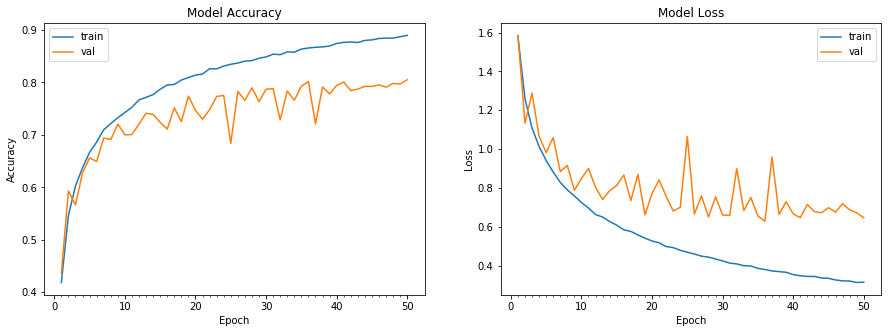

Accuracy on test data is: 80.49


In [0]:
datagen = ImageDataGenerator(zoom_range=0.0, 
                             horizontal_flip=False,
                             vertical_flip=True,
                             rotation_range=15,
                             )


# train the model
start = time.time()
# Train the model
model_info = model.fit_generator(datagen.flow(train_features, train_labels, batch_size = 64),
                                 samples_per_epoch = train_features.shape[0], nb_epoch = 50, 
                                 validation_data = (test_features, test_labels), verbose=1, shuffle=False)
end = time.time()
print ("Model took %0.2f seconds to train"%(end - start))
# plot model history
plot_model_history(model_info)
# compute test accuracy
print ("Accuracy on test data is: %0.2f"%accuracy(test_features, test_labels, model))